In [1]:
# import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression

# sklearn :: evaluation metrics
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)

(51000, 29) (23111, 28)


In [3]:
print(df_train.columns)
df_train.head()

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,41.849684,-87.676270,Pilsen Arts Community Custom Home,Pilsen,17,97.0,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.0,1.0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,34.068613,-118.246455,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.0,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.0,1.0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.701958,-73.917352,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.0,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.0,3.0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,40.742959,-73.990820,Grande Super Large APT !!!,Flatiron District,12,82.0,NaN,10010,1.0,3.0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,34.046473,-117.734095,Private Cozy and Clean Rooms in Pomona,NaN,2,100.0,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.0,1.0


In [4]:
df_property_type_train = pd.get_dummies(df_train['property_type'])
df_train = pd.concat([df_train, df_property_type_train], axis=1)
df_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,Serviced apartment,Tent,Timeshare,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,0,0,0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_property_type_test = pd.get_dummies(df_test['property_type'])
df_test = pd.concat([df_test, df_property_type_test], axis=1)
df_test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Serviced apartment,Tent,Timeshare,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt
0,986942,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,0,0,0,0,0,0,0,0
1,16436737,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",4,1.5,Real Bed,moderate,True,DC,...,0,0,0,0,0,0,0,0,0,0
2,18209634,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",1,1.0,Real Bed,flexible,True,NYC,...,0,0,0,0,0,0,0,0,0,0
3,15027024,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,0,0,0,0,0,0,0,0
4,18074243,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_room_type_train = pd.get_dummies(df_train['room_type'])
df_train = pd.concat([df_train, df_room_type_train], axis=1)
df_train.head()


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt,Entire home/apt,Private room,Shared room
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,1,0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,1,0,0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,1,0,0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,1,0,0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df_room_type_test = pd.get_dummies(df_test['room_type'])
df_test = pd.concat([df_test, df_room_type_test], axis=1)
df_test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt,Entire home/apt,Private room,Shared room
0,986942,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,0,0,0,0,0,0,1,0
1,16436737,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",4,1.5,Real Bed,moderate,True,DC,...,0,0,0,0,0,0,0,0,1,0
2,18209634,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",1,1.0,Real Bed,flexible,True,NYC,...,0,0,0,0,0,0,0,0,1,0
3,15027024,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,0,0,0,0,0,0,1,0
4,18074243,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df_city_train = pd.get_dummies(df_train['city'])
df_train = pd.concat([df_train, df_city_train],axis=1)
df_train.head()


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,Yurt,Entire home/apt,Private room,Shared room,Boston,Chicago,DC,LA,NYC,SF
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,0,0,1,0,0,1,0,0,0,0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,0,1,0,0,0,0,0,1,0,0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,0,1,0,0,0,0,0,0,1,0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,0,1,0,0,0,0,0,0,1,0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,0,0,1,0,0,0,0,1,0,0


In [9]:
df_city_test = pd.get_dummies(df_test['city'])
df_test = pd.concat([df_test, df_city_test],axis=1)
df_test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Yurt,Entire home/apt,Private room,Shared room,Boston,Chicago,DC,LA,NYC,SF
0,986942,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,1,0,0,0,0,0,1,0
1,16436737,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",4,1.5,Real Bed,moderate,True,DC,...,0,0,1,0,0,0,1,0,0,0
2,18209634,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",1,1.0,Real Bed,flexible,True,NYC,...,0,0,1,0,0,0,0,0,1,0
3,15027024,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,1,0,0,0,0,0,1,0
4,18074243,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,strict,True,NYC,...,0,1,0,0,0,0,0,0,1,0


In [10]:
df_neighbourhood_train = pd.get_dummies(df_train['neighbourhood'])
df_train = pd.concat([df_train, df_neighbourhood_train],axis=1)
df_train.head()


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,Winnetka,Winthrop,Woodhaven,Woodland,Woodland Hills/Warner Center,Woodlawn,Woodley Park,Woodridge,Woodside,Wrigleyville
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,0,0,0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_neighbourhood_test = pd.get_dummies(df_test['neighbourhood'])
df_test = pd.concat([df_test, df_neighbourhood_test],axis=1)
df_test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Wilmington,Windsor Terrace,Winnetka,Woodhaven,Woodland Hills/Warner Center,Woodlawn,Woodley Park,Woodridge,Woodside,Wrigleyville
0,986942,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,0,0,0,0,0,0,0,0
1,16436737,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",4,1.5,Real Bed,moderate,True,DC,...,0,0,0,0,0,0,0,0,0,0
2,18209634,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",1,1.0,Real Bed,flexible,True,NYC,...,0,0,0,0,0,0,0,0,0,0
3,15027024,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,0,0,0,0,0,0,0,0
4,18074243,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,0,0,0,0,1,0


In [12]:
print(df_train.shape, df_test.shape)

(51000, 668) (23111, 616)


In [13]:
# select the columns
X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']+list(df_property_type_train)+list(df_room_type_train)+list(df_city_train)+list(df_neighbourhood_train)+list(df_property_type_test)+list(df_room_type_test)+list(df_city_test)+list(df_neighbourhood_test)
X_columns = list(set(X_columns))
y_column = ['log_price']
print(len(X_columns))

668


In [14]:
#adding the missing columns to the train and set their values to 0
for column in X_columns:
    if column not in df_test.columns:
        df_test[column]=0

print(df_train.shape, df_test.shape)

(51000, 668) (23111, 691)


In [15]:
#adding the missing columns to the train and set their values to 0
for column in X_columns:
    if column not in df_train.columns:
            df_train[column]=0
print(df_train.shape, df_test.shape)

(51000, 692) (23111, 691)


In [16]:
# handle missing values
df_train = df_train[X_columns + y_column]
print(df_train.shape)
df_train = df_train.fillna(0.0) # probably not a good idea for 'review_scores_rating'
print(df_train.shape)

(51000, 669)
(51000, 669)


In [17]:
# split the data using sklearn

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40800, 668)
y_train (40800, 1)
X_test (10200, 668)
y_test (10200, 1)


In [18]:
model= LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

RMSE 0.42


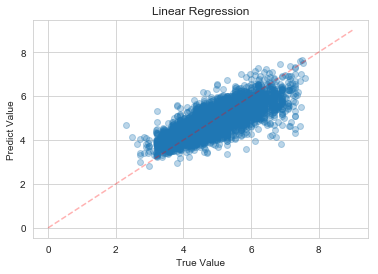

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', round(rmse, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

In [20]:
df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

,id,log_price
0,986942,4.128956
1,16436737,4.506026
2,18209634,3.998171
3,15027024,4.254023
4,18074243,4.948527
5,8446914,5.320014
6,19362916,4.393179
7,16116059,5.742751
8,20912583,4.811329
9,13573101,4.772541


In [21]:
df_test[['id', 'log_price']].to_csv('submission_linear_regression.csv', index=False)